# GSEA dot plot

In [48]:
library(ggplot2)
library(dplyr)
library(stringr)
library(forcats) ## for reordering the factor


In [49]:
df = read.csv("gsea.tsv",sep="\t")
head(df)

,Term,es,nes,pval,fdr,geneset_size,matched_size
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,HALLMARK_UV_RESPONSE_DN,-0.4888729,-2.175577,0,0,144,40
2,HALLMARK_MITOTIC_SPINDLE,-0.3717000,-2.100263,0,0,199,87
3,translational termination,0.7299984,3.668103,0,0,96,47
4,translational elongation,0.6999150,3.711168,0,0,104,55
5,mitochondrial respiratory chain complex I assembly,0.7694024,3.758074,0,0,58,37
6,mitochondrial ATP synthesis coupled electron transport,0.8161274,4.028207,0,0,71,50


In [50]:
df$gene_ratio = df$matched_size/df$geneset_size
head(df)

,Term,es,nes,pval,fdr,geneset_size,matched_size,gene_ratio
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,HALLMARK_UV_RESPONSE_DN,-0.4888729,-2.175577,0,0,144,40,0.2777778
2,HALLMARK_MITOTIC_SPINDLE,-0.3717000,-2.100263,0,0,199,87,0.4371859
3,translational termination,0.7299984,3.668103,0,0,96,47,0.4895833
4,translational elongation,0.6999150,3.711168,0,0,104,55,0.5288462
5,mitochondrial respiratory chain complex I assembly,0.7694024,3.758074,0,0,58,37,0.6379310
6,mitochondrial ATP synthesis coupled electron transport,0.8161274,4.028207,0,0,71,50,0.7042254


In [51]:
# pvalue is all zero, no point to use pvalue for color or size

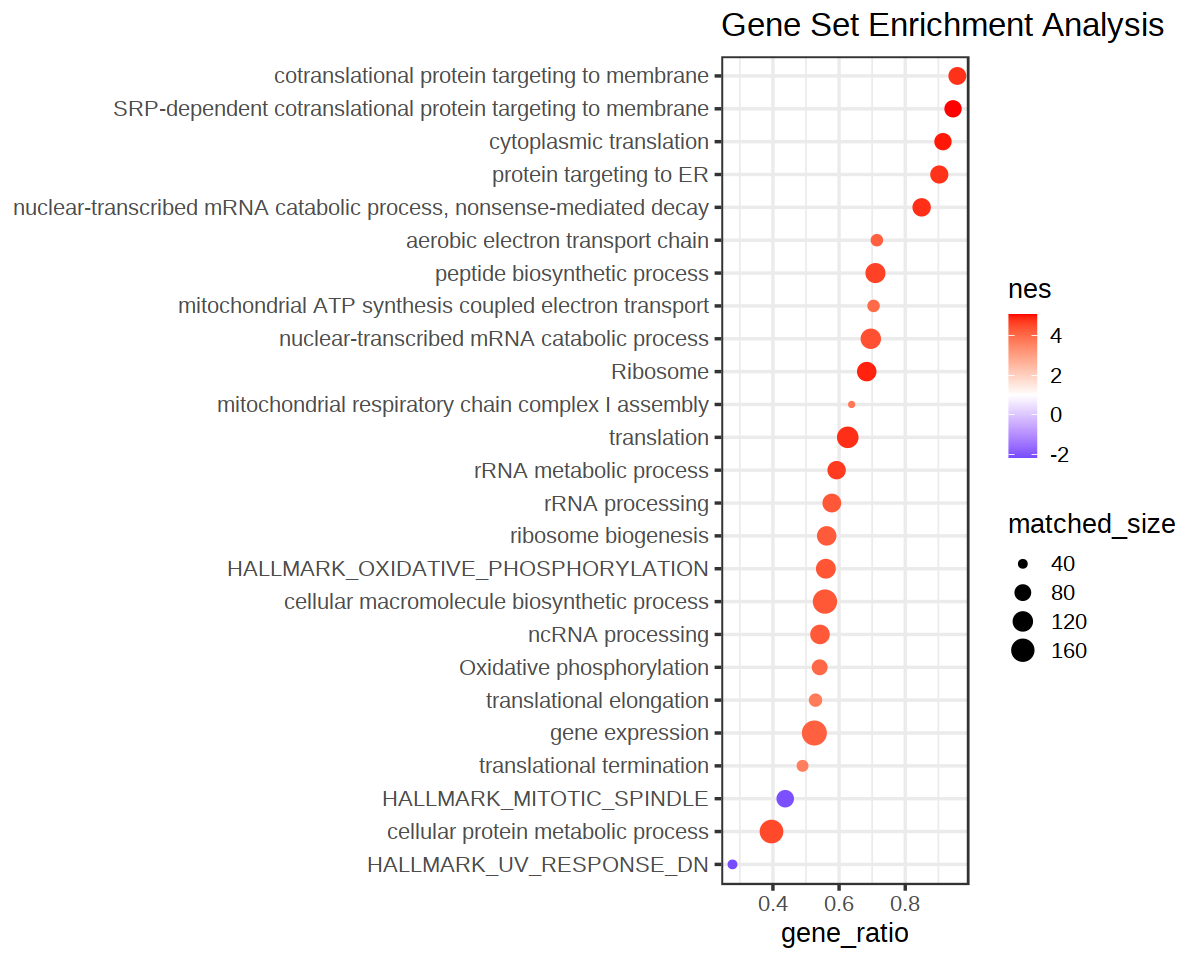

In [52]:
options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(df, aes(x = gene_ratio, y = fct_reorder(Term, gene_ratio))) + 
               geom_point(aes(size = matched_size, color = nes)) +
               theme_bw(base_size = 16) +
        scale_color_gradient2(low="blue", high="red",midpoint=1)+
        ylab(NULL) +
        ggtitle("Gene Set Enrichment Analysis")
ggsave("GSEA.pdf",height=8,width=10)